You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.
You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze clients' behavior and determine which prepaid plan brings in more revenue.

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st

try:
    df1 = pd.read_csv('C:/Users/Cchege/Documents/CC/stats_datasets/megaline_calls.csv')
    df2 = pd.read_csv('C:/Users/Cchege/Documents/CC/stats_datasets/megaline_internet.csv')
    df3 = pd.read_csv('C:/Users/Cchege/Documents/CC/stats_datasets/megaline_messages.csv')
    df4 = pd.read_csv('C:/Users/Cchege/Documents/CC/stats_datasets/megaline_plans.csv')
    df5 = pd.read_csv('C:/Users/Cchege/Documents/CC/stats_datasets/megaline_users.csv')
except:
    df1 = pd.read_csv('/datasets/megaline_calls.csv')
    df2 = pd.read_csv('/datasets/megaline_internet.csv')
    df3 = pd.read_csv('/datasets/megaline_messages.csv')
    df4 = pd.read_csv('/datasets/megaline_plans.csv')
    df5 = pd.read_csv('/datasets/megaline_users.csv')

for each_dataset in [df1, df2, df3, df4, df5]: 
    display(each_dataset.info()) 
    print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
usd_monthly_pay          2 non-null int64
usd_per_gb               2 non-null int64
usd_per_message          2 non-null float64
usd_per_minute           2 non-null float64
plan_name                2 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null object
plan          500 non-null object
churn_date    34 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

Comment: I have had to upload the code as the kernel for the other is not restarting from my end. Kindly use the commented part to use it on your platform.

Studying the content of the data.

2. Changing datatypes

In [103]:
df1['call_date']= pd.to_datetime(df1['call_date'])

print(df1.info())
type(df1['call_date'][0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null datetime64[ns]
duration     137735 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB
None


pandas._libs.tslibs.timestamps.Timestamp

In [104]:
df2['session_date']= pd.to_datetime(df2['session_date'])

print(df2.info())
type(df2['session_date'][0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null datetime64[ns]
mb_used         104825 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB
None


pandas._libs.tslibs.timestamps.Timestamp

In [105]:
df3['message_date']= pd.to_datetime(df3['message_date'])

print(df3.info())
type(df3['message_date'][0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB
None


pandas._libs.tslibs.timestamps.Timestamp

In [106]:
df5['reg_date']= pd.to_datetime(df5['reg_date'])
df5['churn_date']= pd.to_datetime(df5['churn_date'])
print(df5.info())
type(df5['reg_date'][0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null datetime64[ns]
plan          500 non-null object
churn_date    34 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB
None


pandas._libs.tslibs.timestamps.Timestamp

All fields with dates were of datatype object instead of datetime for them to be distinct and useable later on in the project.

In [107]:
df1['month'] = df1['call_date'].dt.month

df1['duration2'] = df1['duration'].apply(np.ceil)
call_stat = df1.pivot_table(index='month', values= ['duration2','id'],aggfunc ={"id":len, "duration2":np.sum})

print(call_stat)

       duration2     id
month                  
1         1180.0    172
2         5495.0    774
3        11241.0   1620
4        24651.0   3442
5        42549.0   5959
6        59271.0   8221
7        79645.0  11105
8        96360.0  13590
9       117986.0  16523
10      149624.0  21064
11      176341.0  24651
12      220004.0  30614


In [108]:
df2['month'] = df2['session_date'].dt.month

df2['mb_used_2'] = df2['mb_used'].apply(np.ceil)
data_stat = df2.pivot_table(index='month', values= ['mb_used_2','id'],aggfunc ={"id":len, "mb_used_2":np.sum})

print(data_stat)

          id  mb_used_2
month                  
1         96    37467.0
2        604   229778.0
3       1336   527387.0
4       2558   938860.0
5       4288  1557069.0
6       6057  2207688.0
7       8110  2998642.0
8      10718  3990285.0
9      12722  4683605.0
10     16193  5976736.0
11     18651  6795276.0
12     23492  8542959.0


Showing the number of calls and data usage per month with the call duration and data usage rounded to the nearest integer minute and integer value mb respectively.

Analysing  calls data to get the mean, variance and stardard deviation.

In [109]:
df1.groupby('month').duration2.describe()


,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
1,172.0,6.860465,5.838294,0.0,1.75,6.0,11.0,26.0
2,774.0,7.099483,5.952522,0.0,2.00,6.0,11.0,32.0
3,1620.0,6.938889,5.816472,0.0,2.00,6.0,11.0,29.0
4,3442.0,7.161825,5.861098,0.0,2.00,7.0,11.0,31.0
5,5959.0,7.140292,5.991276,0.0,2.00,6.0,11.0,34.0
6,8221.0,7.209707,5.999680,0.0,2.00,7.0,11.0,36.0
7,11105.0,7.171995,5.930155,0.0,2.00,6.0,11.0,32.0
8,13590.0,7.090508,5.934223,0.0,2.00,6.0,11.0,37.0
9,16523.0,7.140713,5.985203,0.0,2.00,6.0,11.0,38.0


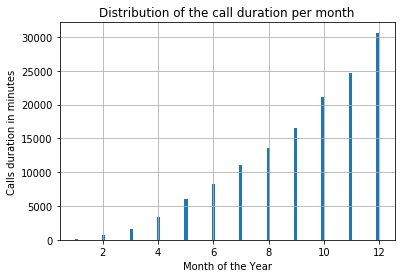

In [110]:
#Showing the distribution of the call duration per month.

df1.month.hist(bins=100)
plt.title('Distribution of the call duration per month')
plt.xlabel('Month of the Year')
plt.ylabel('Calls duration in minutes')
plt.show()

In [111]:
df3['month'] = df3['message_date'].dt.month

message_stat = df3.pivot_table(index='month', values='id',aggfunc ='count')

print(message_stat)

#Analysing message data to get the mean, variance and stardard deviation.

df3.groupby('month').describe()

          id
month       
1         83
2        259
3        594
4       1333
5       2780
6       3833
7       5208
8       7394
9       9227
10     12201
11     14068
12     19071


user_id                                                           \
         count         mean         std     min     25%     50%     75%   
month                                                                     
1         83.0  1185.385542  115.501540  1077.0  1077.0  1196.0  1288.0   
2        259.0  1223.208494  127.268847  1028.0  1077.0  1214.0  1362.0   
3        594.0  1221.388889  134.734547  1028.0  1077.0  1246.0  1362.0   
4       1333.0  1236.998500  126.031248  1028.0  1132.0  1251.0  1328.0   
5       2780.0  1243.598561  135.130694  1004.0  1131.0  1257.0  1336.0   
6       3833.0  1252.968432  140.417404  1004.0  1126.0  1261.0  1361.0   
7       5208.0  1247.325461  142.205259  1004.0  1126.0  1251.0  1362.0   
8       7394.0  1241.752502  139.680746  1001.0  1116.0  1247.0  1347.0   
9       9227.0  1246.469383  140.028186  1001.0  1123.0  1251.0  1357.0   
10     12201.0  1247.740595  138.719208  1001.0  1126.0  1251.0  1362.0   
11     14068.0  1249.430481  141.016615  1001.0  1124.0  1253.0  1371.0   
12     19071.0  1244.223586  140.659121  1000.0  1120.0  1248.0  1365.0   

               
          max  
month          
1      1362.0  
2      1408.0  
3      1445.0  
4      1491.0  
5      1491.0  
6      1491.0  
7      1494.0  
8      1496.0  
9      1496.0  
10     1496.0  
11     1496.0  
12     1497.0

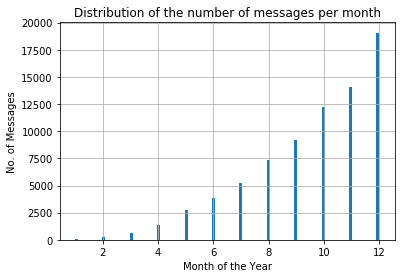

In [112]:
#Showing the distribution of the number of messages per month.

df3.month.hist(bins=100)
plt.title('Distribution of the number of messages per month')
plt.xlabel('Month of the Year')
plt.ylabel('No. of Messages')
plt.show()

In [113]:
df2['month'] = df2['session_date'].dt.month

volume_stat = df2.pivot_table(index='month', values='mb_used_2')

print(volume_stat)

#Analysing data consumption to get the mean, variance and stardard deviation.

df2.groupby('month').describe()

        mb_used_2
month            
1      390.281250
2      380.427152
3      394.750749
4      367.028929
5      363.122435
6      364.485389
7      369.746239
8      372.297537
9      368.150055
10     369.093806
11     364.338427
12     363.653967


user_id                                                           \
         count         mean         std     min     25%     50%     75%   
month                                                                     
1         96.0  1191.822917  108.100732  1042.0  1077.0  1185.0  1214.0   
2        604.0  1242.447020  127.358449  1028.0  1171.0  1214.0  1359.0   
3       1336.0  1231.554641  131.327837  1010.0  1138.0  1214.0  1359.0   
4       2558.0  1224.833464  132.364170  1010.0  1109.0  1214.0  1334.0   
5       4288.0  1228.459422  137.273177  1004.0  1106.0  1220.0  1346.0   
6       6057.0  1228.331847  139.294595  1004.0  1109.0  1210.0  1353.0   
7       8110.0  1229.285450  138.051133  1004.0  1117.0  1220.0  1353.0   
8      10718.0  1234.664956  142.407339  1001.0  1110.0  1223.0  1361.0   
9      12722.0  1245.339884  144.114218  1001.0  1122.0  1236.0  1370.0   
10     16193.0  1246.786760  142.823840  1001.0  1127.0  1240.0  1373.0   
11     18651.0  1248.736314  143.584876  1001.0  1127.0  1244.0  1377.0   
12     23492.0  1250.146859  142.879168  1000.0  1126.0  1253.0  1376.0   

               mb_used              ...                    mb_used_2  \
          max    count        mean  ...       75%      max     count   
month                               ...                                
1      1362.0     96.0  389.813437  ...  574.0400  1231.09      96.0   
2      1498.0    604.0  379.985513  ...  565.0200  1249.60     604.0   
3      1498.0   1336.0  394.313877  ...  597.1250  1668.03    1336.0   
4      1498.0   2558.0  366.600821  ...  560.4900  1535.27    2558.0   
5      1498.0   4288.0  362.688741  ...  553.7475  1536.49    4288.0   
6      1498.0   6057.0  364.063170  ...  557.3800  1439.06    6057.0   
7      1498.0   8110.0  369.316349  ...  557.8800  1585.21    8110.0   
8      1498.0  10718.0  371.868708  ...  559.3725  1541.32   10718.0   
9      1499.0  12722.0  367.720991  ...  558.2675  1604.45   12722.0   
10     1499.0  16193.0  368.660351  ...  554.0600  1604.46   16193.0   
11     1499.0  18651.0  363.910087  ...  549.5400  1495.76   18651.0   
12     1499.0  23492.0  363.226938  ...  550.6575  1693.47   23492.0   

                                                                   
             mean         std  min     25%    50%     75%     max  
month                                                              
1      390.281250  298.270584  0.0  138.00  359.0  574.25  1232.0  
2      380.427152  272.404391  0.0  177.75  359.0  565.50  1250.0  
3      394.750749  291.548386  0.0  161.75  375.0  597.50  1669.0  
4      367.028929  278.016909  0.0  129.25  347.5  561.00  1536.0  
5      363.122435  277.293576  0.0  128.75  344.0  554.00  1537.0  
6      364.485389  279.018606  0.0  132.00  335.0  558.00  1440.0  
7      369.746239  277.030375  0.0  145.00  346.0  558.00  1586.0  
8      372.297537  277.713298  0.0  144.25  348.0  560.00  1542.0  
9      368.150055  277.995285  0.0  137.00  344.0  559.00  1605.0  
10     369.093806  275.642587  0.0  141.00  349.0  555.00  1605.0  
11     364.338427  276.218059  0.0  132.00  342.0  550.00  1496.0  
12     363.653967  277.217300  0.0  132.00  341.0  551.00  1694.0  

[12 rows x 24 columns]

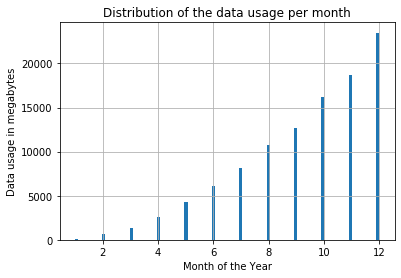

In [114]:
#Showing the distribution of the data usage per month.

df2.month.hist(bins=100)
plt.title('Distribution of the data usage per month')
plt.xlabel('Month of the Year')
plt.ylabel('Data usage in megabytes')
plt.show()

In [115]:
df5['month'] = df5['reg_date'].dt.month

call_per_user = df1.pivot_table(index=['user_id','month'], values= ['duration2'],aggfunc ='sum')

user_plan= df5.pivot_table(index=['user_id'], values= ['plan','age','city'],aggfunc = 'first')

user_message= df3.pivot_table(index=['user_id','month'], values= ['id'],aggfunc ='count')

user_data= df2.pivot_table(index=['user_id','month'], values= ['mb_used_2'],aggfunc ='sum')

#df6 =call_per_user.join(user_plan)

#df7 = df6.join(user_message)

#df8 = df7.join(user_data)



df8 =df8 = call_per_user.join(user_plan, how='outer').join(user_message,how='outer').join(user_data,how='outer')

df8.columns=['call_duration','age','city','plan','msg_count','mb_used']

df8.rename(columns={'id':'msg_count'}, inplace=True)

df9 =df8.reset_index().merge(df4, left_on='plan',right_on='plan_name',how = 'left')

print(df9.head(5))
display(df9.info())

   user_id  month  call_duration   age                                   city  \
0     1000     12          124.0  45.0  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001      8          182.0  28.0        Seattle-Tacoma-Bellevue, WA MSA   
2     1001      9          315.0  28.0        Seattle-Tacoma-Bellevue, WA MSA   
3     1001     10          393.0  28.0        Seattle-Tacoma-Bellevue, WA MSA   
4     1001     11          426.0  28.0        Seattle-Tacoma-Bellevue, WA MSA   

       plan  msg_count  mb_used  messages_included  mb_per_month_included  \
0  ultimate       11.0   1903.0             1000.0                30720.0   
1      surf       30.0   6929.0               50.0                15360.0   
2      surf       44.0  13333.0               50.0                15360.0   
3      surf       53.0  22356.0               50.0                15360.0   
4      surf       36.0  18524.0               50.0                15360.0   

   minutes_included  usd_monthly_pay  usd_per_gb  

None

Aggregating the information needed per user to calculate the profit.

In [116]:
df9['msg_profit'] = df9.apply(lambda x: max(0,x['msg_count'] - x['messages_included'])*x['usd_per_message'] ,1)
df9['calls_profit'] = df9.apply(lambda y: max(0,y['call_duration'] - y['minutes_included'])*y['usd_per_minute'], 1)
df9['data_profit'] = df9.apply(lambda z: max(0,z['mb_used'] - z['mb_per_month_included'])*z['usd_per_gb'], 1)
df9['profit'] = df9['data_profit'] + df9['calls_profit'] + df9['msg_profit'] + df9['usd_monthly_pay']
print(df9.head(5))

   user_id  month  call_duration   age                                   city  \
0     1000     12          124.0  45.0  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001      8          182.0  28.0        Seattle-Tacoma-Bellevue, WA MSA   
2     1001      9          315.0  28.0        Seattle-Tacoma-Bellevue, WA MSA   
3     1001     10          393.0  28.0        Seattle-Tacoma-Bellevue, WA MSA   
4     1001     11          426.0  28.0        Seattle-Tacoma-Bellevue, WA MSA   

       plan  msg_count  mb_used  messages_included  mb_per_month_included  \
0  ultimate       11.0   1903.0             1000.0                30720.0   
1      surf       30.0   6929.0               50.0                15360.0   
2      surf       44.0  13333.0               50.0                15360.0   
3      surf       53.0  22356.0               50.0                15360.0   
4      surf       36.0  18524.0               50.0                15360.0   

   minutes_included  usd_monthly_pay  usd_per_gb  

Profit from each user including the initial charge for each plan respectively.

In [117]:
print(df9.pivot_table(index=['month','plan'], values= ['msg_count','call_duration','mb_used'],aggfunc ='mean'))


                call_duration       mb_used  msg_count
month plan                                            
1     surf         203.000000   4881.000000  21.000000
      ultimate     193.500000   6926.250000  20.666667
2     surf         297.000000  12192.888889  21.600000
      ultimate     470.333333  17906.500000  27.800000
3     surf         330.000000  13361.043478  21.937500
      ultimate     304.250000  18340.250000  34.714286
4     surf         351.540000  12243.061224  24.166667
      ultimate     336.857143  16140.476190  28.937500
5     surf         410.240000  14410.837838  33.870370
      ultimate     406.241379  16643.758621  44.333333
6     surf         435.791667  15652.627660  33.708333
      ultimate     387.444444  15938.244444  37.135135
7     surf         453.733333  16946.252101  36.033333
      ultimate     427.067797  16363.677966  41.212766
8     surf         417.849057  17214.576923  37.917355
      ultimate     421.436620  17834.887324  47.929825
9     surf

Finding the mean for call_dutation, mb_used and text messages for each plan per month.

In [118]:
print(df9.pivot_table(index=['month','plan'], values= ['msg_count','call_duration','mb_used'],aggfunc =np.var))

                call_duration       mb_used    msg_count
month plan                                              
1     surf       15842.000000  1.827706e+07          NaN
      ultimate   16572.333333  1.642061e+07   310.333333
2     surf       52226.500000  4.377810e+07   512.800000
      ultimate   54345.066667  4.047629e+07   529.700000
3     surf       35809.363636  6.839062e+07   352.062500
      ultimate   61984.931818  1.406093e+08   613.904762
4     surf       50866.743265  5.734854e+07   534.028571
      ultimate   34888.928571  8.859513e+07   512.862500
5     surf       56938.779459  5.837506e+07   877.548917
      ultimate   43841.046798  5.689892e+07  1246.933333
6     surf       44094.061404  4.566182e+07   948.970070
      ultimate   37902.570707  6.722775e+07   801.731231
7     surf       59802.012325  6.349874e+07   917.470787
      ultimate   72563.374635  6.855162e+07   858.084181
8     surf       52122.749224  7.103085e+07  1031.659780
      ultimate   53645.506640  

Finding the variance for call_duration, mb_used and text messages for each plan per month.

In [119]:
print(df9.pivot_table(index=['month','plan'], values= ['msg_count','call_duration','mb_used'],aggfunc =np.std))

                call_duration       mb_used  msg_count
month plan                                            
1     surf         125.865007   4275.167599        NaN
      ultimate     128.733575   4052.235052  17.616280
2     surf         228.531179   6616.502257  22.645088
      ultimate     233.120284   6362.098105  23.015212
3     surf         189.233622   8269.861896  18.763329
      ultimate     248.967732  11857.880971  24.777102
4     surf         225.536567   7572.882161  23.109058
      ultimate     186.785783   9412.498689  22.646468
5     surf         238.618481   7640.357153  29.623452
      ultimate     209.382537   7543.137575  35.311943
6     surf         209.985860   6757.353113  30.805358
      ultimate     194.685826   8199.253159  28.314859
7     surf         244.544500   7968.609821  30.289780
      ultimate     269.375898   8279.590645  29.293074
8     surf         228.304072   8427.980282  32.119461
      ultimate     231.614997   7781.204098  32.161901
9     surf

Finding the standard deviation for call_dutation, mb_used and text messages for each plan per month.

In [120]:
df9.groupby('plan').profit.describe()

#Showing how the average profit from users of Ultimate and Surf calling plans differs.

,count,mean,std,min,25%,50%,75%,max
plan,,,,,,,,
surf,1545.0,36001.95723,52286.580576,20.0,20.0,14970.0,56460.0,556320.37
ultimate,713.0,2212.42216,11024.238752,70.0,70.0,70.0,70.0,111468.00


In [121]:
from scipy import stats as st

st.ttest_ind(df9[df9.plan=='ultimate'].profit, df9[df9.plan=='surf'].profit)

Ttest_indResult(statistic=-17.07962978652687, pvalue=1.327184764092776e-61)

t = -11.62550863303345
p = 8.3147127880418e-28
The average profit from users of Ultimate and Surf calling plans is equal


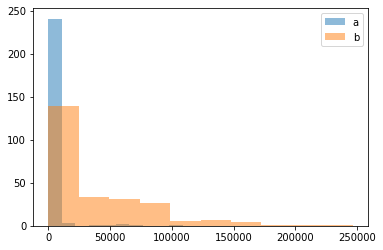

In [125]:
n = 250
mean_surf = 36001
mean_ultimate = 2212
alpha = 0.05
H0 = 'The average profit from users of Ultimate and Surf calling plans is equal'
H1 = 'The average profit from users of Ultimate and Surf calling plans differs'

a = df9[df9['plan'] == 'ultimate'].profit.sample(n)
b = df9[df9['plan'] == 'surf'].profit.sample(n)

plt.hist(a,alpha = .5, bins = 10, label = 'a')
plt.hist(b,alpha = .5, bins = 10, label = 'b')
plt.legend()

t2,p2 = st.ttest_ind(a,b)
print('t = ' +str(t2))
print('p = ' +str(p2))
if (p2 < alpha):
    print(H0)
else:
    print(H1)
    

Student's Comments: 
The pvalue is higher ther the alpha and so we can reject the null hypothesis, and say that the average profit of the two plans differs.

In [126]:
df9.groupby(df9['city'] == 'NY-NJ').profit.describe()

,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
False,2258.0,25332.365332,46425.900637,20.0,23.54,70.0,36637.5225,556320.37


In [127]:

df9.groupby([df9["city"].str.contains('NY-NJ')]).profit.describe()

,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
False,1887.0,24970.883196,47218.973024,20.0,25.415,70.0,35305.00,556320.37
True,371.0,27170.955067,42173.116852,20.0,20.000,70.0,43226.23,266030.00


The average profit from users in NY-NJ area is different from that of the users from other regions. Even if the mean for NY-NJ is less than for other cities put together.

t = -0.42288137185234087
p = 0.6724335644888784
The average profit from users in NY-NJ and those outside NY-NJ differs.


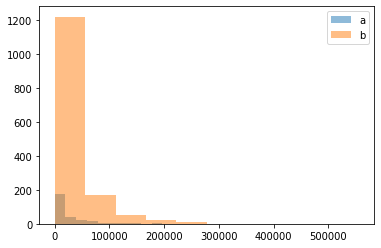

In [136]:
n = 250
mean_NY_NJ = 24971
mean_others = 27170
alpha = 0.05
H0 = 'The average profit from users in NY-NJ and those outside NY-NJ are the same.'
H1 = 'The average profit from users in NY-NJ and those outside NY-NJ differs.'

a = df9[df9["city"].str.contains('NY-NJ')].profit
b = df9[~df9['city'].str.contains('NY-NJ')].profit

plt.hist(a,alpha = .5, bins = 10, label = 'a')
plt.hist(b,alpha = .5, bins = 10, label = 'b')
plt.legend()

t2,p2 = st.ttest_ind(a,b)
print('t = ' +str(t2))
print('p = ' +str(p2))
if (p2 < alpha):
    print(H0)
else:
    print(H1)

In [137]:
df9.dropna(inplace=True)
st.ttest_ind(df9[df9["city"].str.contains('NY-NJ')].profit, df9[~df9["city"].str.contains('NY-NJ')].profit)

Ttest_indResult(statistic=-0.42288137185234087, pvalue=0.6724335644888784)

General Conclusion: Surf has a very high mean as compared to Ultimate and so surf is more profitable that ultimate.The mean profit for NY-NJ is higher than for the other cities put together but their profitability is the same.
    